INFO:tensorflow:Restoring parameters from ./weight_image/my-model-5
<PIL.Image.Image image mode=F size=28x28 at 0x7F59DCBF0E80>


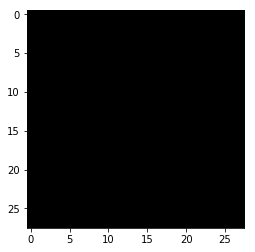

<PIL.Image.Image image mode=F size=28x28 at 0x7F59DCA1FBA8>


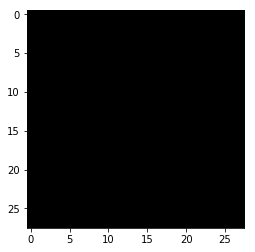

<PIL.Image.Image image mode=F size=28x28 at 0x7F59DC9BEC88>


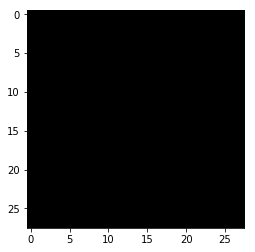

<PIL.Image.Image image mode=F size=28x28 at 0x7F59DC8C5C50>


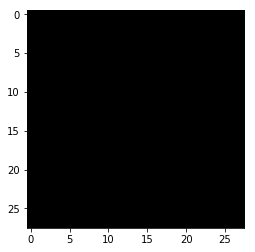

<PIL.Image.Image image mode=F size=28x28 at 0x7F59DC8B2EB8>


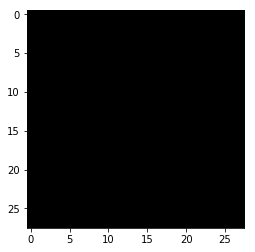

<PIL.Image.Image image mode=F size=28x28 at 0x7F59DC81CBE0>


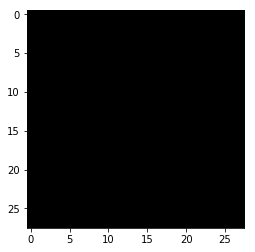

<PIL.Image.Image image mode=F size=28x28 at 0x7F59BD80A908>


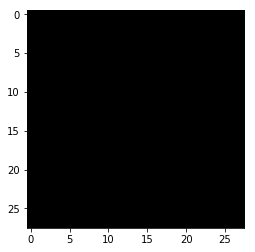

<PIL.Image.Image image mode=F size=28x28 at 0x7F59BD5F3F28>


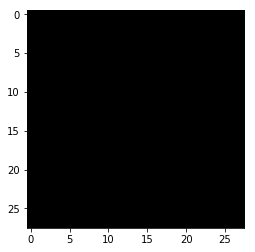

<PIL.Image.Image image mode=F size=28x28 at 0x7F59DC0322B0>


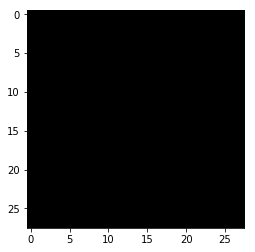

<PIL.Image.Image image mode=F size=28x28 at 0x7F59BD4C6F28>


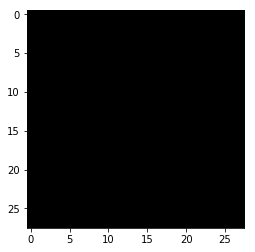

In [5]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
Y = tf.placeholder(shape=[None], dtype=tf.uint8)
W = tf.Variable(tf.zeros([784, 10]))
B = tf.Variable(tf.zeros([10]))
Y_one = tf.one_hot(Y, 10, axis=1)

H = tf.matmul(X, W) + B
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_one, logits=H))

optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss)

# acc
test_val = tf.nn.softmax(H)
Accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(test_val, 1), tf.argmax(Y_one, 1)), dtype=tf.float32))

#saver
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./weight_image/my-model-5")
    data = sess.run(W)
    trans_data = data.transpose()
    for i in range(0, 10):
        a = (trans_data[i].reshape(28,28))
        img = Image.fromarray(a)
        print(img)
        imgplot = plt.imshow(img)
        plt.show(img)